In [ ]:
classes = [
		"pink primrose",
		"hard-leaved pocket orchid",
		"canterbury bells",
		"sweet pea",
		"english marigold",
		"tiger lily",
		"moon orchid",
		"bird of paradise",
		"monkshood",
		"globe thistle",
		"snapdragon",
		"colt's foot",
		"king protea",
		"spear thistle",
		"yellow iris",
		"globe-flower",
		"purple coneflower",
		"peruvian lily",
		"balloon flower",
		"giant white arum lily",
		"fire lily",
		"pincushion flower",
		"fritillary",
		"red ginger",
		"grape hyacinth",
		"corn poppy",
		"prince of wales feathers",
		"stemless gentian",
		"artichoke",
		"sweet william",
		"carnation",
		"garden phlox",
		"love in the mist",
		"mexican aster",
		"alpine sea holly",
		"ruby-lipped cattleya",
		"cape flower",
		"great masterwort",
		"siam tulip",
		"lenten rose",
		"barbeton daisy",
		"daffodil",
		"sword lily",
		"poinsettia",
		"bolero deep blue",
		"wallflower",
		"marigold",
		"buttercup",
		"oxeye daisy",
		"common dandelion",
		"petunia",
		"wild pansy",
		"primula",
		"sunflower",
		"pelargonium",
		"bishop of llandaff",
		"gaura",
		"geranium",
		"orange dahlia",
		"pink-yellow dahlia?",
		"cautleya spicata",
		"japanese anemone",
		"black-eyed susan",
		"silverbush",
		"californian poppy",
		"osteospermum",
		"spring crocus",
		"bearded iris",
		"windflower",
		"tree poppy",
		"gazania",
		"azalea",
		"water lily",
		"rose",
		"thorn apple",
		"morning glory",
		"passion flower",
		"lotus",
		"toad lily",
		"anthurium",
		"frangipani",
		"clematis",
		"hibiscus",
		"columbine",
		"desert-rose",
		"tree mallow",
		"magnolia",
		"cyclamen",
		"watercress",
		"canna lily",
		"hippeastrum",
		"bee balm",
		"ball moss",
		"foxglove",
		"bougainvillea",
		"camellia",
		"mallow",
		"mexican petunia",
		"bromelia",
		"blanket flower",
		"trumpet creeper",
		"blackberry lily",
]	

In [2]:
import matplotlib.pyplot as plt # for plotting
import numpy as np # for transformation

import torch # PyTorch package
import torchvision # load datasets
import torchvision.transforms as transforms # transform data
import torch.nn as nn # basic building block for neural neteorks
import torch.nn.functional as F # import convolution functions like Relu
import torch.optim as optim # optimzer
#from tqdm.notebook import tqdm

In [3]:
def imshow(img, title=None):
  ''' function to show image '''
  img = img / 2 + 0.5 # unnormalize
  npimg = img.numpy() # convert to numpy objects
  ax = plt.subplot() 
  ax.imshow(np.transpose(npimg, (1, 2, 0)))
  if (title is not None):
    ax.set_title(title)
  plt.show()

In [4]:
y = np.array(classes)
batch_size = 16

In [5]:
# composing several transforms together
transform = transforms.Compose([
	transforms.CenterCrop(size=500),
	#transforms.Resize((500,500)), 
	transforms.ToTensor(), # to tensor object
	transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]) # mean = 0.5, std = 0.5

In [6]:

# load train data
trainset = torchvision.datasets.Flowers102(root='./data', split="train",
										download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
											shuffle=True)

# load test data
testset = torchvision.datasets.Flowers102(root='./data', split="test",
										 download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
										 shuffle=False)

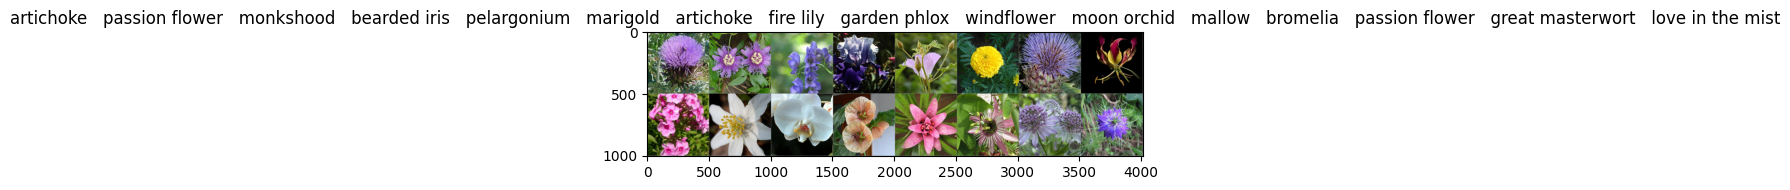

In [7]:
dataiter = iter(trainloader)
images, labels = next(dataiter)

# call function on our images
imshow(torchvision.utils.make_grid(images), np.apply_along_axis('   '.join, 0 ,y[labels]))

In [23]:
class Net(nn.Module):
    def __init__(self, num_channels, classes):
        super(Net, self).__init__()

        self.conv1 = nn.Conv2d(in_channels=num_channels, out_channels=classes * 2, kernel_size=(3,3))
        self.relu1 = nn.ReLU()
        self.maxpool1 = nn.MaxPool2d(kernel_size=(2,2), stride=(2,2))

        self.conv2 = nn.Conv2d(in_channels=classes * 2, out_channels=classes * 4, kernel_size=(3,3))
        self.relu2 = nn.ReLU()
        self.maxpool2 = nn.MaxPool2d(kernel_size=(2,2), stride=(2,2))

        self.fc1 = nn.Linear(in_features=1500, out_features=500)
        self.relu3 = nn.ReLU()

        self.fc2 = nn.Linear(in_features=500, out_features=classes)
        self.logSoftmax = nn.LogSoftmax(dim=1)
    
    def forward(self, x):
        # pass the input through our first set of CONV => RELU =>
        # POOL layers
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.maxpool1(x)
        # pass the output from the previous layer through the second
        # set of CONV => RELU => POOL layers
        x = self.conv2(x)
        x = self.relu2(x)
        x = self.maxpool2(x)
        # flatten the output from the previous layer and pass it
        # through our only set of FC => RELU layers
        x = x.view(x.shape[0], -1)
        x = self.fc1(x)
        x = self.relu3(x)
        # pass the output to our softmax classifier to get our output
        # predictions
        x = self.fc2(x)
        output = self.logSoftmax(x)
        # return the output predictions
        return output   




    

In [18]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

In [24]:
def train(model, iterator, optimizer, criterion, device):

    epoch_loss = 0
    epoch_acc = 0

    model.train()

    for (x, y) in iterator:
        x = x.to(device)
        y = y.to(device)

        optimizer.zero_grad()

        y_pred, _ = model.forward(x)

        loss = criterion(y_pred, y)


        loss.backward()

        optimizer.step()

        epoch_loss += loss.item()
        epoch_acc += F.acc.item()

    return epoch_loss / len(iterator), epoch_acc / len(iterator)

In [25]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = Net(3, len(classes))
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
criterion = nn.CrossEntropyLoss()

model = model.to(device)
criterion = criterion.to(device)
count_parameters(model)

1556810

In [26]:
train(model, trainloader, optimizer, criterion, device)

OutOfMemoryError: CUDA out of memory. Tried to allocate 3.02 GiB (GPU 0; 8.00 GiB total capacity; 3.12 GiB already allocated; 0 bytes free; 6.01 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF